In [12]:
import pandas as pd

train_pd = pd.read_csv("./data/fashion/fashion-train.csv")
train_pd.pop('label')

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

batch_size = 100
latent_size = 28
train_ds = torch.Tensor(train_pd.to_numpy())
train_dl = DataLoader(train_ds, batch_size, shuffle=True,num_workers=4,pin_memory=True)

for _ in train_dl:
    print(_.shape)
    break

torch.Size([100, 784])


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [15]:
# Discriminator
D = nn.Sequential(
    nn.Linear(784,360),
    nn.LeakyReLU(0.2),
    nn.Linear(360,180),
    nn.LeakyReLU(0.2),
    nn.Linear(180,1),
    nn.Sigmoid()
)
D.to(device)

# Generator
G = nn.Sequential(
    nn.Linear(latent_size, 180),
    nn.ReLU(),
    nn.Linear(180, 360),
    nn.ReLU(),
    nn.Linear(360,784)
)
G.to(device)
\\

Sequential(
  (0): Linear(in_features=28, out_features=180, bias=True)
  (1): ReLU()
  (2): Linear(in_features=180, out_features=360, bias=True)
  (3): ReLU()
  (4): Linear(in_features=360, out_features=784, bias=True)
)

In [18]:
real_labels = torch.ones(batch_size,1).to(device)
fake_labels = torch.zeros(batch_size,1).to(device)


def d_fit(real_images):
    real_images = real_images.to(device)
    real_preds = D(real_images)
    real_d_loss = loss_fn(real_preds, real_labels)
    # real_score = real_preds
    
    
    rand = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(rand)
    fake_preds = D(fake_images)
    fake_d_loss = loss_fn(fake_preds, fake_labels) 
    # fake_score = fake_preds
    
    d_loss = real_d_loss + fake_d_loss
    
    d_opt.zero_grad()
    g_opt.zero_grad()
    
    d_loss.backward()
    
    d_opt.step()
    
    # return d_loss,real_score,fake_score
    return d_loss

In [19]:
def g_fit():
    fake_preds = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(fake_preds)
    g_loss = loss_fn(D(fake_images), fake_labels)
    
    d_opt.zero_grad()
    g_opt.zero_grad()
    
    g_loss.backward()
    
    g_opt.step()
    
    # return g_loss,fake_images
    return g_loss
    

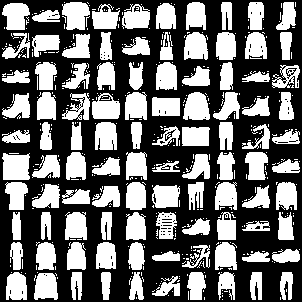

In [20]:
from IPython.display import Image
from torchvision.utils import save_image

for images in train_dl:
    images = images.reshape(len(images),1,28,28)
    save_image(images,"./data/fashion/gans_data/real_images.png",nrow=10)
    break

Image("./data/fashion/gans_data/real_images.png")

torch.Size([100, 784])


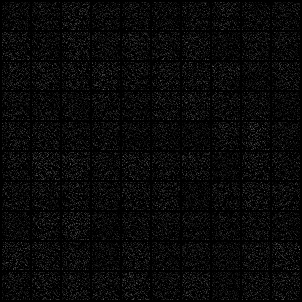

In [21]:
def save_fake_images(index):
    fake_images = G(torch.randn(batch_size,latent_size).to(device))
    print(fake_images.shape)
    fake_images = fake_images.reshape((batch_size,1,28,28))
    
    save_image(fake_images, "./data/fashion/gans_data/fake_images_"+str(index)+".png", nrow=10)

save_fake_images(0)
Image("./data/fashion/gans_data/fake_images_0.png")

In [22]:
epochs = 100

for epoch in range(epochs):
    for images in train_dl:
        real_images = images.to(device)
        
        # d_loss,real_score,fake_score = d_fit(real_images)
        # g_loss,fake_images = g_fit()

        d_loss = d_fit(real_images)
        g_loss = g_fit()
        
    print("Epoch:",epoch+1)
    if (epoch+1)%10==0:
        print("G_Loss:",g_loss.item(),"    D_Loss:",d_loss.item())
        # print("Real_Score:",real_score.mean().item(),"    Fake_Score:",fake_score.mean().item())
        save_fake_images(epoch+1)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
G_Loss: 0.0     D_Loss: 0.0
torch.Size([100, 784])
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16


KeyboardInterrupt: 